In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv(r'h:\SpeclizationTraingClass\sales_dataRFC.csv')

print(df.head())
print(df.info())


   Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0        1052  2023-02-03       Bob  North       5053.97             18   
1        1093  2023-04-21       Bob   West       4384.02             17   
2        1015  2023-09-21     David  South       4631.23             30   
3        1072  2023-08-24       Bob  South       2167.94             39   
4        1061  2023-03-24   Charlie   East       3750.20             13   

  Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0        Furniture     152.75      267.22     Returning      0.09   
1        Furniture    3816.39     4209.44     Returning      0.11   
2             Food     261.56      371.40     Returning      0.20   
3         Clothing    4330.03     4467.75           New      0.02   
4      Electronics     637.37      692.71           New      0.08   

  Payment_Method Sales_Channel Region_and_Sales_Rep  
0           Cash        Online            North-Bob  
1           Cash        Re

In [5]:
df['Sales_Class'] = pd.cut(
    df['Sales_Amount'],
    bins=[0, 1000, 5000, df['Sales_Amount'].max()],
    labels=['Low', 'Medium', 'High']
)


In [9]:
target_column = 'Sales_Class'

X = df.drop(columns=[target_column])
y = df[target_column]


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le


In [11]:
if y.dtype == "object":
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [14]:
y_pred = model.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00        22

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:

[[178   0]
 [  0  22]]


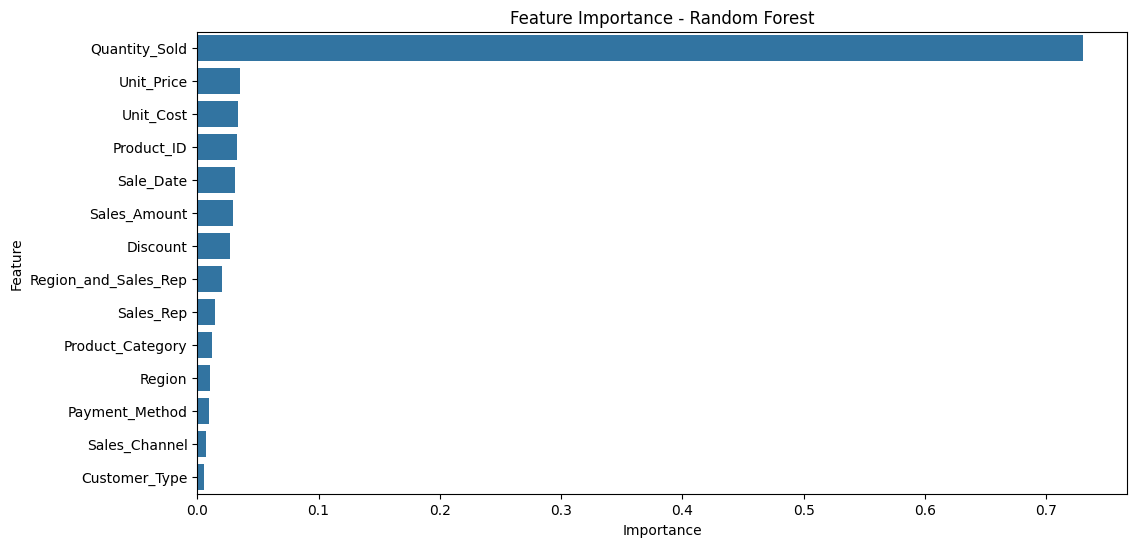

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [17]:
new_input = {
    'Product_ID': 'P1001',
    'Sale_Date': '2023-08-15',
    'Sales_Rep': 'John',
    'Region': 'East',
    'Quantity_Sold': 6,
    'Product_Category': 'Electronics',
    'Unit_Cost': 500,
    'Unit_Price': 700,
    'Customer_Type': 'Regular',
    'Discount': 10,
    'Payment_Method': 'Card',
    'Sales_Channel': 'Online',
    'Region_and_Sales_Rep': 'East_John'
}


In [20]:
new_df = pd.DataFrame([new_input])

# add missing columns
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0

# reorder columns
new_df = new_df[X.columns]



In [21]:
for col in new_df.columns:
    if col in label_encoders:
        le = label_encoders[col]
        new_df[col] = new_df[col].apply(
            lambda x: x if x in le.classes_ else le.classes_[0]
        )
        new_df[col] = le.transform(new_df[col])


In [24]:
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_product_id = LabelEncoder()
X['Product_ID'] = le_product_id.fit_transform(X['Product_ID'])


In [26]:
import numpy as np
import pandas as pd

try:
    # Encode Product_ID using the trained LabelEncoder
    new_df['Product_ID'] = le_product_id.transform(new_df['Product_ID'])
    
    # Make prediction
    prediction = model.predict(new_df)
    print("Predicted Class:", le_target.inverse_transform(prediction)[0])

except ValueError as e:
    # This will catch the "could not convert string to float" error
    print("Error during prediction:", e)
    print("It seems some input values were not seen during training.")
    
    # Optionally, you can encode unseen categories as -1 (works for tree-based models)
    for col in ['Product_ID']:  # add other categorical columns if needed
        new_df[col] = new_df[col].apply(lambda x: le_product_id.transform([x])[0] if x in le_product_id.classes_ else -1)
    
    # Retry prediction after handling unseen values
    prediction = model.predict(new_df)
    print("Predicted Class after handling unseen values:", le_target.inverse_transform(prediction)[0])



Error during prediction: invalid literal for int() with base 10: 'P1001'
It seems some input values were not seen during training.
Predicted Class after handling unseen values: 0
